<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/homework_0/End_to_end_Machine_Learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**End-to-end Machine Learning project**


# Setup

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

#Other required imports
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [32]:
sns.set(style="ticks")
df = pd.read_csv("/content/drive/My Drive/indian_liver_patient.csv")
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [33]:
#Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


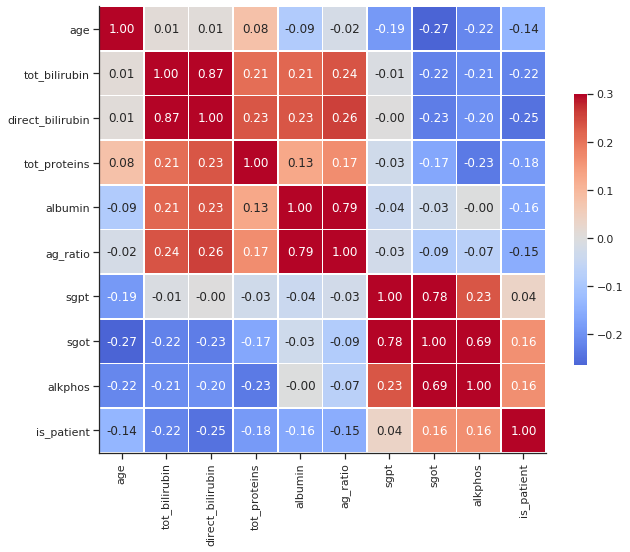

In [34]:
#Correlation plot using Seaborn
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,10)
    
plt.show()

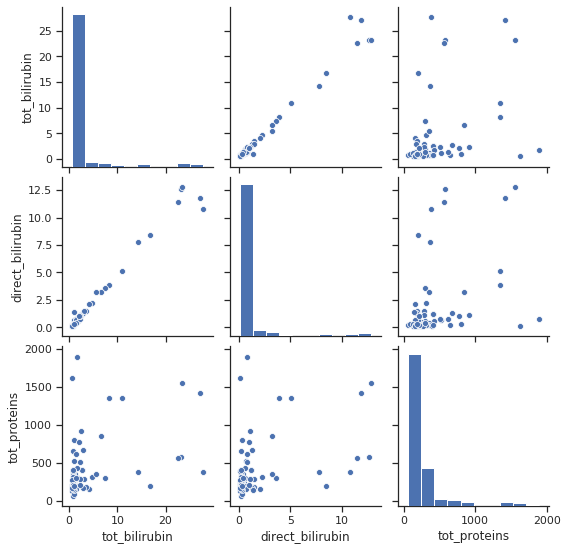

In [35]:
#Pairplots
filtered_df = df[(df['gender'].isin(['Female']))]

# Single line to create pairplot
g = sns.pairplot(filtered_df[['tot_bilirubin','direct_bilirubin','tot_proteins']])

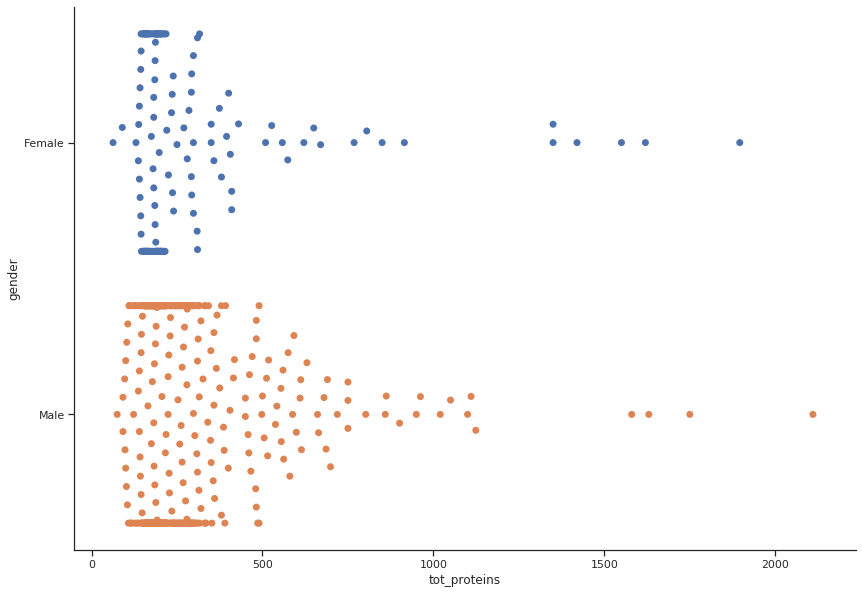

In [36]:
#Swarmplots
g = sns.swarmplot(y = "gender",
              x = 'tot_proteins', 
              data = df,
              # Decrease the size of the points to avoid crowding 
              size = 7)
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

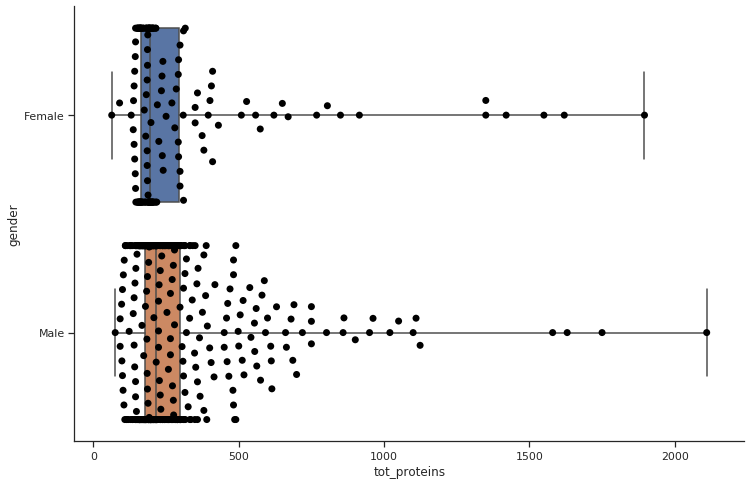

In [37]:
#Swarmplots with boxplots
g = sns.boxplot(y = "gender",
              x = 'tot_proteins', 
              data = df, whis=np.inf)
g = sns.swarmplot(y = "gender",
              x = 'tot_proteins', 
              data = df,
              # Decrease the size of the points to avoid crowding 
              size = 7,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

# Data preprocessing

In [0]:
#Transfrom Gender string into float values
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'gender'] = le.transform(df['gender'])

#Remove rows with missing values
df = df.dropna(how = 'any', axis = 0)

#Also transform Selector variable into usual conventions followed
df['is_patient'] = df['is_patient'].map({2:0, 1:1})

In [39]:
#Overview of data
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Splitting data into train-test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'is_patient'], df['is_patient'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selecting and training model

In [48]:
#Using feature-scaled data
logreg_scaled = LogisticRegression(C = 0.1).fit(X_train_scaled, y_train)
print("Logistic Regression Classifier on scaled test data:")
print("Accuracy:", logreg_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, logreg_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, logreg_scaled.predict(X_test_scaled)))

Logistic Regression Classifier on scaled test data:
Accuracy: 0.7172413793103448
Precision: 0.7172413793103448
Recall: 1.0
F-1 score: 0.8353413654618473
